<a href="https://colab.research.google.com/github/respwill/Abalone_age_regression/blob/main/Abalone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo > /dev/null 2>&1

# Data gathering and Explanation
- Data source - I downloaded the data from below url.  
Url: https://archive.ics.uci.edu/dataset/1/abalone  


- Machine learning problem:  
It is a physical mearsurement of abalone to predict its age.  

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Basic statistics of features
The number of total records is 4177 and there are 8 features.  
All features has no missing value.  
I can observe that there might be some anomaly since min height is 0 and min shucked_weight is also too small.  

In [4]:
X['Sex'].notnull().sum()

4177

In [5]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


# Anomally detection


## Statistical view
It is unusual that Height is 0 although they are infant records.  
It also seems to be unusual that shucked_weight is only 0.001mg.  
I decided to remove those records first.  

In [6]:
X[X['Height']==0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505


In [7]:
X[X['Shucked_weight']==0.001]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
236,I,0.075,0.055,0.01,0.002,0.001,0.0005,0.0015


In [8]:
X_r = X[X['Height']!=0]
X_r = X_r[X_r['Shucked_weight']!=0.001]

In [9]:
X_r.shape

(4174, 8)

In [10]:
X_r.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,0.524172,0.408025,0.139614,0.829203,0.359562,0.180696,0.238891
std,0.119882,0.099081,0.041682,0.490241,0.221912,0.109583,0.139180
min,0.110000,0.090000,0.015000,0.008000,0.002500,0.000500,0.003000
25%,0.450000,0.350000,0.115000,0.442500,0.186500,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153750,0.502000,0.253000,0.328875
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [11]:
import matplotlib.pyplot as plt

## Length, Diameter, Height vs. Whole_weight
Length, Diameter, and Height are measurement related to size of abalone.  
It is natural that greater size often corresponds to greater weight.  
I will check if there is any datapoint that is out of this trend.  

### Height and Weight
I can observe 3 data points that are out of trend.  
I'll remove them from dataset.  

Text(0, 0.5, 'Whole_weight')

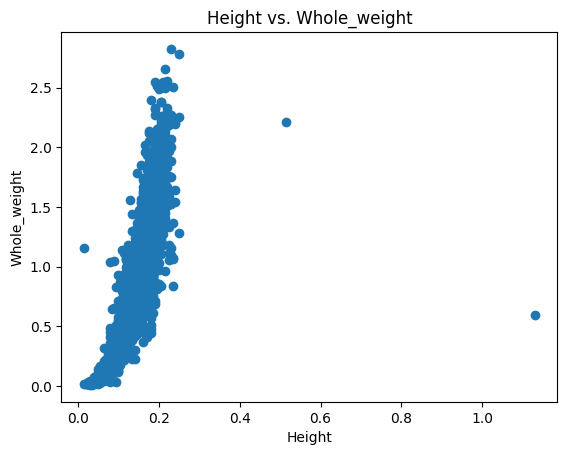

In [12]:
subset = X_r.sort_values(by='Height')
x_label = 'Height'
y_label = 'Whole_weight'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [13]:
X_r[X_r['Height'].between(0.4, 2.0)]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335


In [14]:
op1 = X_r['Height']<0.02
op2 = X_r['Whole_weight']>1.0
X_r[op1 & op2]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.308,0.2885


In [15]:
X_r2 = X_r[~X_r['Height'].between(0.4, 2.0)]
X_r2 = X_r2[~(op1&op2)]
X_r2.shape

<ipython-input-15-1a8a1e87ddfe>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_r2 = X_r2[~(op1&op2)]


(4171, 8)

Text(0, 0.5, 'Whole_weight')

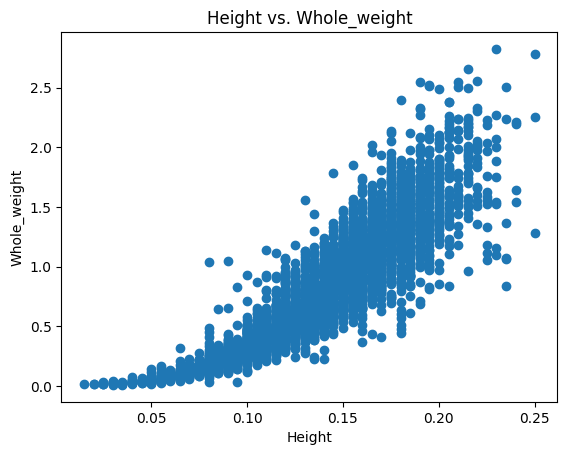

In [16]:
subset = X_r2.sort_values(by='Height')
x_label = 'Height'
y_label = 'Whole_weight'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

### Diameter and weight
diameter and weight seems to be aligned well.  

Text(0, 0.5, 'Whole_weight')

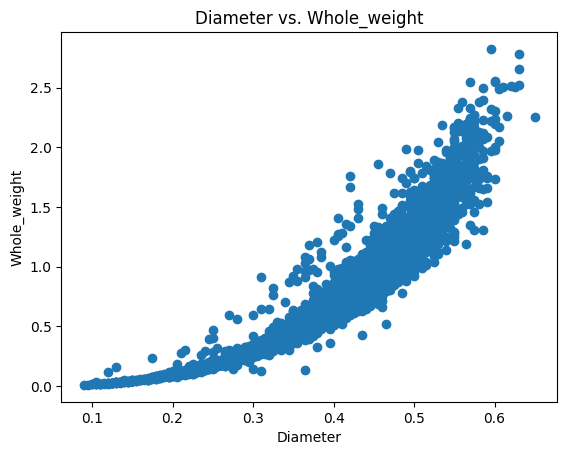

In [17]:
subset = X_r2.sort_values(by='Diameter')
x_label = 'Diameter'
y_label = 'Whole_weight'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

### Length and weight
I can observe one data point seems to be an outlier.  

Text(0, 0.5, 'Whole_weight')

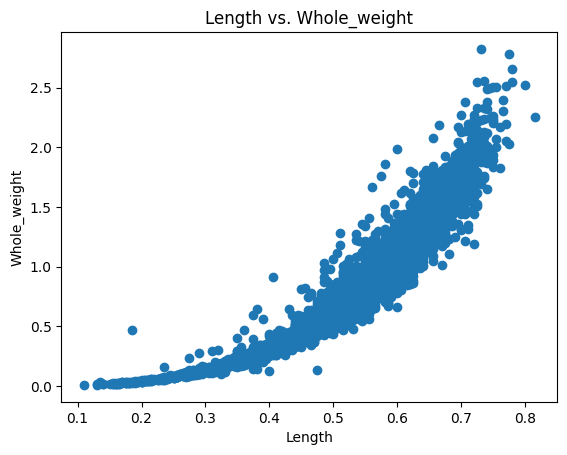

In [18]:
subset = X_r2.sort_values(by='Length')
x_label = 'Length'
y_label = 'Whole_weight'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [19]:
op1 = X_r2['Length']<0.2
op2 = X_r2['Whole_weight']>0.4
X_r2[op1 & op2]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
1210,I,0.185,0.375,0.12,0.4645,0.196,0.1045,0.15


In [20]:
X_r3 = X_r2[~(op1&op2)]
X_r3.shape

(4170, 8)

## Length vs. Height vs. Diameter

### Length vs. Height
Strong postive relationship can be observed between Length and Height.  
Three out of them seems to be outliers.    


Text(0, 0.5, 'Height')

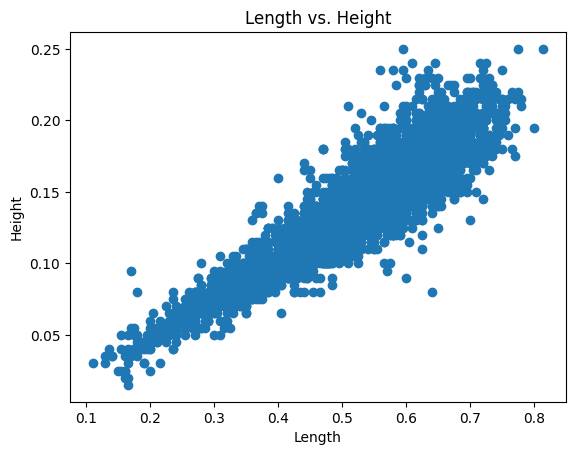

In [21]:
subset = X_r3.sort_values(by='Length')
x_label = 'Length'
y_label = 'Height'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [22]:
op1 = X_r3['Length']<0.2
op2 = X_r3['Height']>0.07
X_r3[op1 & op2]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
149,I,0.17,0.130,0.095,0.030,0.0130,0.008,0.01
3141,I,0.18,0.135,0.080,0.033,0.0145,0.007,0.01


In [23]:
X_r4 = X_r3[~(op1 & op2)]
X_r4.shape

(4168, 8)

In [24]:
op1 = X_r4['Length']>0.6
op2 = X_r4['Height']<0.1
X_r4[(op1&op2)]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
2801,M,0.64,0.515,0.08,1.042,0.515,0.1755,0.175


In [25]:
X_r4 = X_r4[~(op1 & op2)]
X_r4.shape

(4167, 8)

Text(0, 0.5, 'Height')

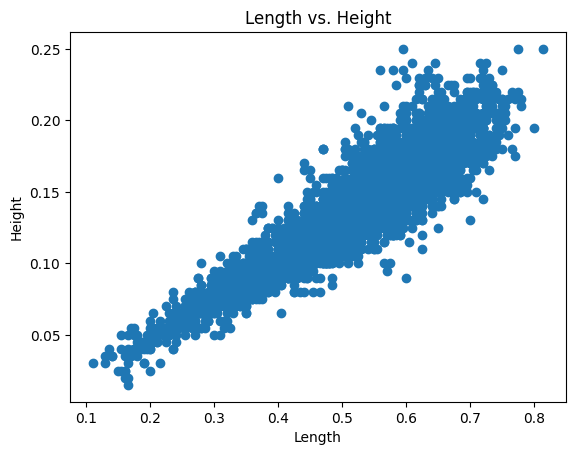

In [26]:
subset = X_r4.sort_values(by='Length')
x_label = 'Length'
y_label = 'Height'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

### Length vs. Diameter
Length and Diagram have strong positive relationship too.  
One datapoint seems to be out of trend.  

Text(0, 0.5, 'Diameter')

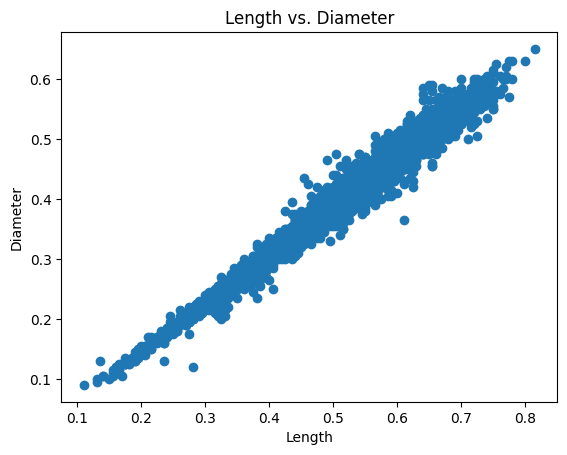

In [27]:
subset = X_r4.sort_values(by='Length')
x_label = 'Length'
y_label = 'Diameter'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [28]:
op1 = X_r4['Length']>0.25
op2 = X_r4['Diameter']<0.15
X_r4[op1 & op2]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
898,I,0.28,0.12,0.075,0.117,0.0455,0.029,0.0345


In [29]:
X_r4 = X_r4[~(op1 & op2)]
X_r4.shape

(4166, 8)

Text(0, 0.5, 'Diameter')

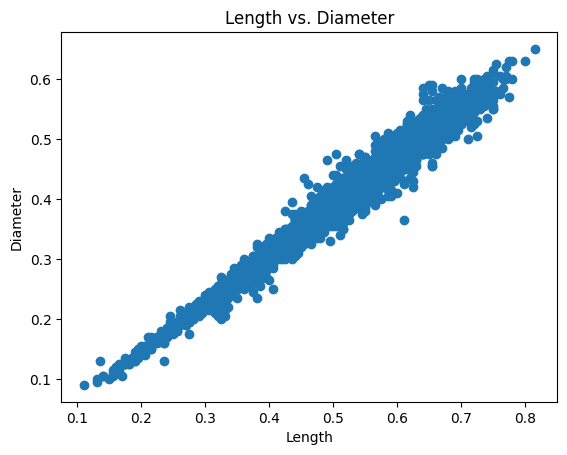

In [30]:
subset = X_r4.sort_values(by='Length')
x_label = 'Length'
y_label = 'Diameter'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

### Height vs. Diameter

Text(0, 0.5, 'Diameter')

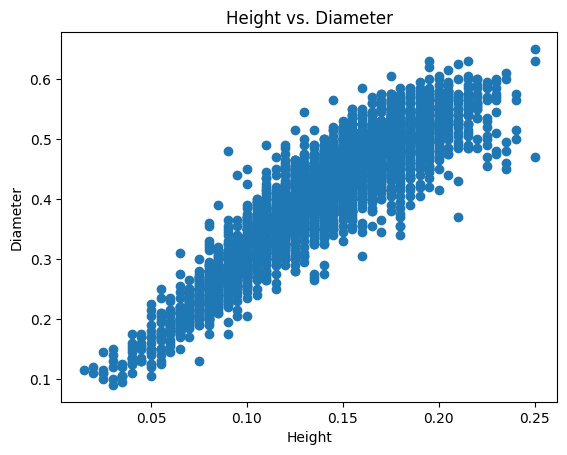

In [31]:
subset = X_r4.sort_values(by='Height')
x_label = 'Height'
y_label = 'Diameter'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

## Weights
Whole_weight vs. Shucked_weight, Viscera_weight, Shell_weight.  
Whole_weight is not same with sum of Shucked_weight, Viscera_weight, Shell_weight exactly.  
The difference is between -0.057 and 0.143 in most cases.  

In [32]:
X_r4.shape

(4166, 8)

In [33]:
X_r4['weight_sum'] = X_r4['Shucked_weight'] + X_r4['Viscera_weight'] + X_r4['Shell_weight']

In [34]:
op1 = X_r4['Whole_weight'] != X_r4['weight_sum']
X_r4[op1].shape

(4161, 9)

In [35]:
X_r4['weight_diff'] = X_r4['Whole_weight'] - X_r4['weight_sum']

Text(0, 0.5, 'Weight diff')

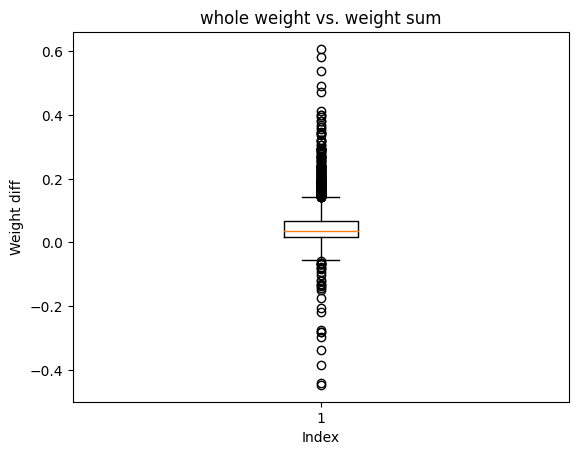

In [36]:
plt.boxplot(X_r4['weight_diff'])
plt.title('whole weight vs. weight sum')
plt.xlabel('Index')
plt.ylabel('Weight diff')

In [37]:
q1 = X_r4['weight_diff'].quantile(0.25)
q3 = X_r4['weight_diff'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + iqr*1.5
lower_bound = q1 - iqr*1.5
print(round(lower_bound,3), round(upper_bound,3))

-0.057 0.143


In [38]:
op1 = X_r4['weight_diff'].between(-0.057, 0.143)
X_r5 = X_r4[op1]
X_r5.shape

(3902, 10)

Text(0, 0.5, 'Weight diff')

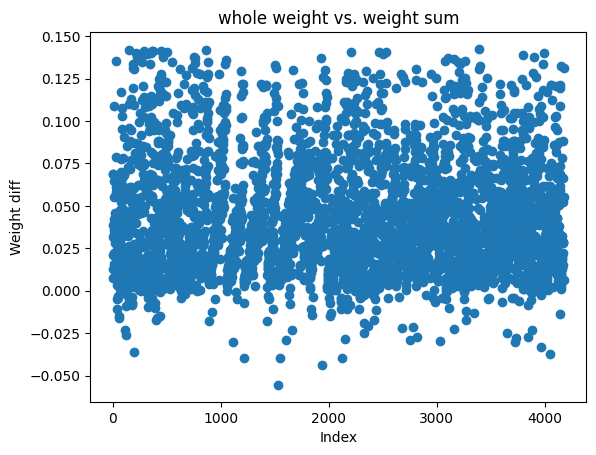

In [39]:
plt.scatter(X_r5.index, X_r5['weight_diff'])
plt.title('whole weight vs. weight sum')
plt.xlabel('Index')
plt.ylabel('Weight diff')

## Sex
There are three kinds of sex in this dataset: Male, Female, and Infant.  
The number of each sex is descending with next order: Male, Infant, and Female.  
While looking at features that are related to size, It seems there is no difference between Male and Female. But the adult and infant are different in size and weight



In [40]:
X_r5['Sex'].value_counts()

Sex
M    1413
I    1312
F    1177
Name: count, dtype: int64

In [41]:
# Create a color dictionary
color_dict = {'M': 'blue', 'F': 'red', 'I': 'green'}


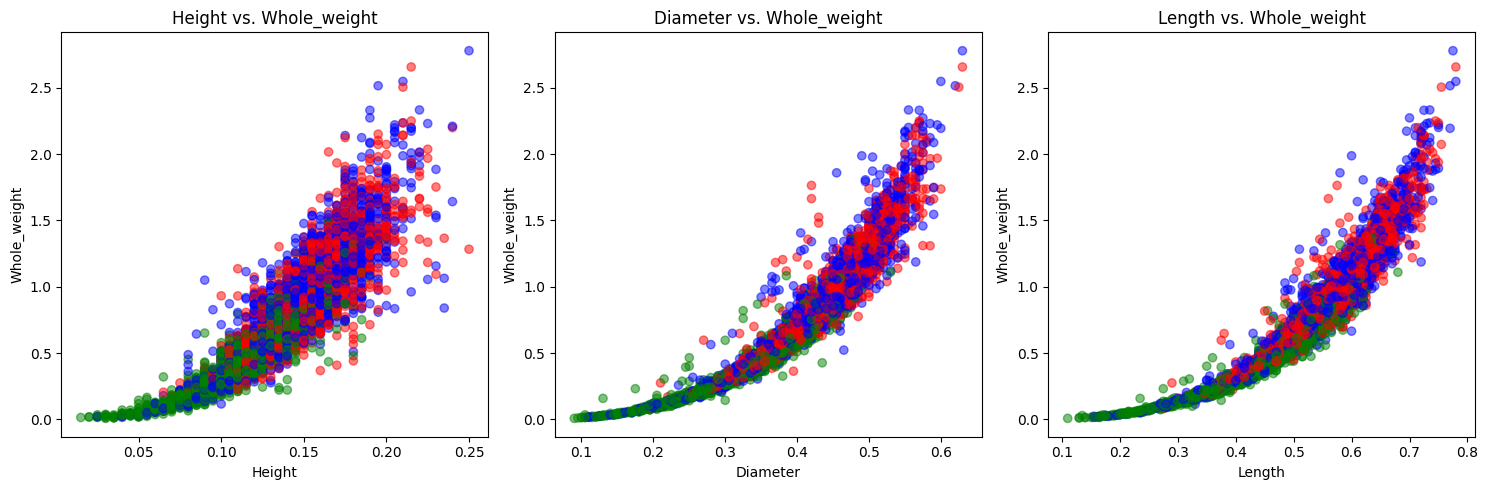

In [42]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for idx, c in enumerate(['Height', 'Diameter', 'Length']):
    subset = X_r5.sort_values(by='Height')
    x_label = c
    y_label = 'Whole_weight'
    # Map colors to the ColorCategory column
    colors = subset['Sex'].map(color_dict)
    axs[idx].scatter(subset[x_label], subset[y_label], c=colors, alpha=0.5)
    axs[idx].set_title(f'{x_label} vs. {y_label}')
    axs[idx].set_xlabel(x_label)
    axs[idx].set_ylabel(y_label)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()